In [2]:
import numpy as np
from tensorflow import keras
from PIL import Image

In [3]:
input_dim = (96, 96, 3)
batch_size = 64
classes = 21
epochs = 50

In [4]:
# Create a simple CNN Model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same', input_shape=input_dim))
model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))         
model.add(keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(21, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
# Show architecture!
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 256)       590080    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 256)       590080    
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0

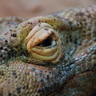

In [6]:
# Load the small dataset and shuffle order
with np.load('./train_small.npz') as f:
    X = f['X'] # Load input images
    y = f['y'] # Load Labels
    
    ind = np.arange(X.shape[0]) # Create Index
    np.random.shuffle(ind) # Shuffle Index
    X = X[ind,] # Shuffle X
    y = keras.utils.to_categorical(y[ind,]) # Shuffle X and create dummy variables
# Show first image
Image.fromarray(X[0], 'RGB')

In [7]:
# Compile the model
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'])

In [8]:
# Train
results = model.fit(x=X, y=y, 
              batch_size=batch_size, 
              epochs=epochs, 
              validation_split=0.2, 
              shuffle=True)

Train on 7560 samples, validate on 1890 samples
Epoch 1/50
7560/7560 [==============================] - 16s 2ms/sample - loss: 3.2336 - categorical_accuracy: 0.0675 - val_loss: 2.9531 - val_categorical_accuracy: 0.0979
Epoch 2/50
7560/7560 [==============================] - 12s 2ms/sample - loss: 2.8558 - categorical_accuracy: 0.1140 - val_loss: 2.7342 - val_categorical_accuracy: 0.1386
Epoch 3/50
7560/7560 [==============================] - 12s 2ms/sample - loss: 2.7244 - categorical_accuracy: 0.1497 - val_loss: 2.6518 - val_categorical_accuracy: 0.1693
Epoch 4/50
7560/7560 [==============================] - 12s 2ms/sample - loss: 2.6391 - categorical_accuracy: 0.1786 - val_loss: 2.5150 - val_categorical_accuracy: 0.2196
Epoch 5/50
7560/7560 [==============================] - 12s 2ms/sample - loss: 2.5596 - categorical_accuracy: 0.1968 - val_loss: 2.4868 - val_categorical_accuracy: 0.2323
Epoch 6/50
7560/7560 [==============================] - 12s 2ms/sample - loss: 2.4945 - categoric

7560/7560 [==============================] - 12s 2ms/sample - loss: 0.3605 - categorical_accuracy: 0.8869 - val_loss: 3.0604 - val_categorical_accuracy: 0.4513
Epoch 49/50
7560/7560 [==============================] - 12s 2ms/sample - loss: 0.3249 - categorical_accuracy: 0.8943 - val_loss: 3.2076 - val_categorical_accuracy: 0.4476
Epoch 50/50
7560/7560 [==============================] - 12s 2ms/sample - loss: 0.3116 - categorical_accuracy: 0.9007 - val_loss: 3.3209 - val_categorical_accuracy: 0.4349


In [9]:
# Save model
model.save('./my_model')

In [11]:
# Diese Zelle muss von mir ausgeführt werden können!
# Es müssen mindestens loss und categorical_accuracy angezeigt werden

model = keras.models.load_model('./my_model')
with np.load('./test.npz') as f:
    X_test = f['X']
    y_test = keras.utils.to_categorical(f['y'])
results = model.evaluate(X_test, y_test, batch_size=32)

9450/9450 [==============================] - 6s 623us/sample - loss: 3.3177 - categorical_accuracy: 0.4426
